#Name: Krish Thapa Magar
#Student ID: 2417379

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Datasets/car_price_dataset.csv'
df = pd.read_csv(file_path)

#**REGRESSION TASK**

#1.Exploratory Data Analysis and Data Understanding

First 5 rows of the dataset:
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  

Missing values in the dataset:
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

Summary statistics:
               Year   Engine_Size        Mileage         Doors  

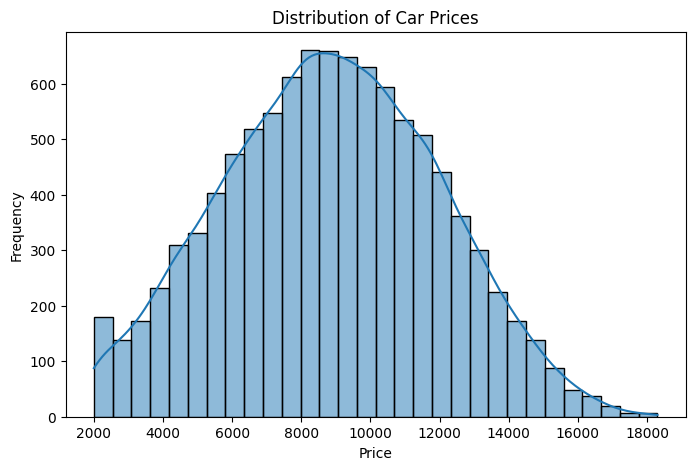

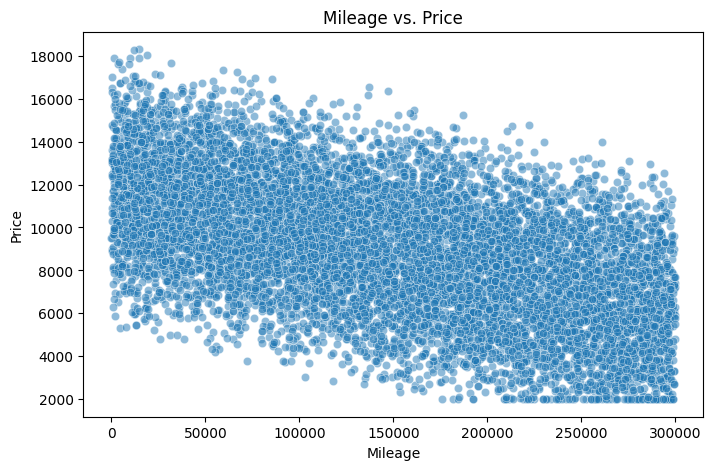

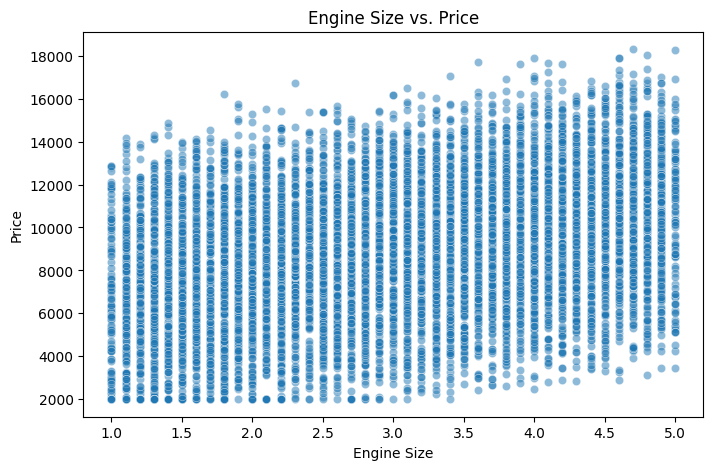

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Data visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Mileage vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Mileage'], y=df['Price'], alpha=0.5)
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter plot of Engine Size vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Engine_Size'], y=df['Price'], alpha=0.5)
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

#**2.Build A Model From scratch**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Separate features and target variable
X = df.drop(columns=["Price"])  # Features
y = df["Price"]  # Target variable

# Define categorical and numerical columns
categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Combine encoded categorical and scaled numerical features
X_processed = np.hstack((X_scaled, X_encoded))  # Ensure both are 2D

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

Training MSE: 8119.15
Testing MSE: 4213.92
Training R²: 0.9992
Testing R²: 0.9995


#**3.Build A primary Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Feature selection and encoding
categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]
numerical_cols = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count"]

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

X_categorical = ohe.fit_transform(df[categorical_cols])
X_numerical = scaler.fit_transform(df[numerical_cols])
X = np.hstack((X_numerical, X_categorical))
y = df["Price"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

# Evaluation
lin_mae = mean_absolute_error(y_test, y_pred_lin)
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
lin_r2 = r2_score(y_test, y_pred_lin)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

# Display results
print("Linear Regression:")
print(f"MAE: {lin_mae:.2f}, RMSE: {lin_rmse:.2f}, R²: {lin_r2:.4f}")
print("\nRandom Forest Regressor:")
print(f"MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}, R²: {rf_r2:.4f}")

Linear Regression:
MAE: 20.00, RMSE: 64.91, R²: 0.9995

Random Forest Regressor:
MAE: 260.31, RMSE: 334.81, R²: 0.9878


#**4.Hyper-parameter Optimization with Cross-Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline (scaling is important for linear regression)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Define hyperparameters to search
param_grid = {
    'model__fit_intercept': [True, False]}


# Apply GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display results
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation R² Score: {best_score:.4f}")


Best Hyperparameters: {'model__fit_intercept': True}
Best Cross-Validation R² Score: 0.9992


#**5. Feature Selection**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the base model for RFE
base_model = LinearRegression()

# Apply RFE to select the most important features
rfe = RFE(estimator=base_model, n_features_to_select=5)  # Selecting top 5 features
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Get selected feature names
feature_names = np.hstack((numerical_cols, ohe.get_feature_names_out(categorical_cols)))
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]

# Retrain models with selected features
lin_reg_selected = LinearRegression()
lin_reg_selected.fit(X_train_selected, y_train)
rf_reg_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_selected.fit(X_train_selected, y_train)

# Predictions
y_pred_lin_selected = lin_reg_selected.predict(X_test_selected)
y_pred_rf_selected = rf_reg_selected.predict(X_test_selected)

# Evaluation
lin_mae_selected = mean_absolute_error(y_test, y_pred_lin_selected)
lin_rmse_selected = np.sqrt(mean_squared_error(y_test, y_pred_lin_selected))
lin_r2_selected = r2_score(y_test, y_pred_lin_selected)

rf_mae_selected = mean_absolute_error(y_test, y_pred_rf_selected)
rf_rmse_selected = np.sqrt(mean_squared_error(y_test, y_pred_rf_selected))
rf_r2_selected = r2_score(y_test, y_pred_rf_selected)

# Display results
print("Selected Features:", selected_features)
print("\nLinear Regression (Selected Features):")
print(f"MAE: {lin_mae_selected:.2f}, RMSE: {lin_rmse_selected:.2f}, R²: {lin_r2_selected:.4f}")
print("\nRandom Forest Regressor (Selected Features):")
print(f"MAE: {rf_mae_selected:.2f}, RMSE: {rf_rmse_selected:.2f}, R²: {rf_r2_selected:.4f}")

Selected Features: ['Year', 'Engine_Size', 'Mileage', 'Fuel_Type_Electric', 'Transmission_Automatic']

Linear Regression (Selected Features):
MAE: 330.70, RMSE: 407.31, R²: 0.9819

Random Forest Regressor (Selected Features):
MAE: 393.21, RMSE: 488.34, R²: 0.9740


#6.Final Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]
numerical_cols = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count"]

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

X_categorical = ohe.fit_transform(df[categorical_cols])
X_numerical = scaler.fit_transform(df[numerical_cols])
X = np.hstack((X_numerical, X_categorical))
y = df["Price"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using RFE
base_model = LinearRegression()
rfe = RFE(estimator=base_model, n_features_to_select=5)
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

feature_names = np.hstack((numerical_cols, ohe.get_feature_names_out(categorical_cols)))
selected_features = [feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]]

# Hyperparameter Tuning using GridSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

param_grid = {'model__fit_intercept': [True, False]}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Extract best parameters correctly
best_params_cleaned = {k.split('__')[-1]: v for k, v in best_params.items()}

# Train final models
lin_reg_final = LinearRegression(**best_params_cleaned)
lin_reg_final.fit(X_train_selected, y_train)
rf_reg_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_final.fit(X_train_selected, y_train)

# Predictions
y_pred_lin_final = lin_reg_final.predict(X_test_selected)
y_pred_rf_final = rf_reg_final.predict(X_test_selected)

# Evaluation Metrics
lin_mae_final = mean_absolute_error(y_test, y_pred_lin_final)
lin_rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_lin_final))
lin_r2_final = r2_score(y_test, y_pred_lin_final)

rf_mae_final = mean_absolute_error(y_test, y_pred_rf_final)
rf_rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_rf_final))
rf_r2_final = r2_score(y_test, y_pred_rf_final)

# Display Results
print("Final Selected Features:", selected_features)
print("\nBest Hyperparameters for Linear Regression:", best_params)
print("\nFinal Model Performance:")
print("\nLinear Regression:")
print(f"MAE: {lin_mae_final:.2f}, RMSE: {lin_rmse_final:.2f}, R²: {lin_r2_final:.4f}")
print("\nRandom Forest Regressor:")
print(f"MAE: {rf_mae_final:.2f}, RMSE: {rf_rmse_final:.2f}, R²: {rf_r2_final:.4f}")

Final Selected Features: ['Year', 'Engine_Size', 'Mileage', 'Fuel_Type_Electric', 'Transmission_Automatic']

Best Hyperparameters for Linear Regression: {'model__fit_intercept': True}

Final Model Performance:

Linear Regression:
MAE: 330.70, RMSE: 407.31, R²: 0.9819

Random Forest Regressor:
MAE: 393.21, RMSE: 488.34, R²: 0.9740
